In [27]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Import data

This dataset is generated from the Customer Relationship Management System. This system allows the public to correspond to the MTA about complaints or commendations in a variety of categories. The dataset contains information about areas of customer service and how that service was rated.

In [20]:
df=pd.read_csv("Data/MTA_Customer_Feedback_Data__Beginning_2014_20231023.csv")
df.head()

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,SIM33C
2,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,B8
3,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,BM4
4,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,Q46


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623757 entries, 0 to 623756
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     623757 non-null  object 
 1   Commendation or Complaint  623757 non-null  object 
 2   Subject Matter             623755 non-null  object 
 3   Subject Detail             621577 non-null  object 
 4   Issue Detail               568368 non-null  object 
 5   Year                       623755 non-null  float64
 6   Quarter                    623755 non-null  float64
 7   Branch/Line/Route          621697 non-null  object 
dtypes: float64(2), object(6)
memory usage: 38.1+ MB


In [67]:
df.Agency.unique()
# ['Buses', 'Long Island Rail Road', 'Metro-North Railroad',
#        'MTA Board', 'MTA Capital Construction', 'MTA Corporate Office',
#        'NYC Buses', 'Subways', 'Agency']
df['Commendation or Complaint'].value_counts()
# max(df['Year'])
# min(df['Year'])

df['Subject Matter'].value_counts()

# df[df['Subject Matter']=='Station /Bus Stop /Facility /Structure']['Subject Detail'].value_counts()
# df[df['Subject Matter']=='Station']['Subject Detail'].value_counts()
# df[df['Subject Matter']=='Employees']['Subject Detail'].value_counts()
# df[df['Subject Matter']=='Employee']['Subject Detail'].value_counts()

Employees                                 223233
Travel Disruption / Trip Problem          135759
Station /Bus Stop /Facility /Structure    107664
Trains                                     57220
Buses                                      26341
Telephone / Website / Mobile Apps          14079
Customer                                   13152
Policies, Rules & Regulations              12581
Schedules / Reservations                    9771
MetroCard/Tickets/E-Zpass & Tolls           9076
Employee                                    4388
Service                                     2822
Station                                     2814
Construction / Capital Projects             1337
Train                                       1239
Complaint                                    613
Bus                                          570
MTA Agency Cars / Trucks                     465
Bus Stop                                     270
Commendation                                  89
Public Hearing      

In [19]:
df.Agency.value_counts()

NYC Buses                   300660
Subways                     220800
Long Island Rail Road        53179
Metro-North Railroad         42601
Buses                         6418
MTA Corporate Office            83
MTA Capital Construction        13
Agency                           2
MTA Board                        1
Name: Agency, dtype: int64

## Subways

<AxesSubplot:>

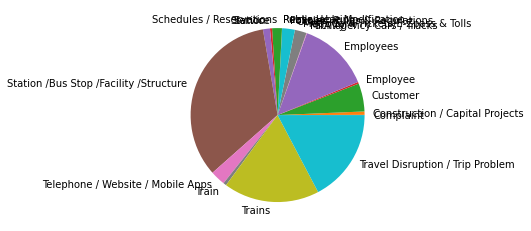

In [18]:
subways=df[df['Agency']=='Subways'].copy()
subways['Year'].value_counts()#years range from 2014-2019
subways['Commendation or Complaint'].value_counts()#Complaint213804>Commendation6996
subways[subways['Commendation or Complaint']=='Complaint'].groupby('Subject Matter').size().plot(kind='pie')

In [77]:
# subways[subways['Commendation or Complaint']=='Commendation'].info()#

# station_subjects=['Station /Bus Stop /Facility /Structure','Station']
# service_subjects=['Employees','Employee']
# train_subject=['Train','Trains']
# subways[subways['Commendation or Complaint']=='Complaint'].groupby('Subject Matter').size().sort_values()
# #subways[(subways['Commendation or Complaint']=='Commendation') & (subways['Subject Matter'].isin(['Employee','Employees']))]
# # df[df['Subject Matter']=='Service']['Subject Detail'].value_counts()
# df[df['Subject Matter']=='Travel Disruption / Trip Problem']['Subject Detail'].value_counts()

In [24]:
subways_commendation_and_complaints=subways.groupby(['Year','Commendation or Complaint']).size().reset_index()
subways_commendation_and_complaints.rename(columns={0:'count'},inplace=True)
subways_commendation_and_complaints

,Year,Commendation or Complaint,count
0,2014.0,Commendation,437
1,2014.0,Complaint,10193
2,2015.0,Commendation,504
3,2015.0,Complaint,13541
4,2016.0,Commendation,958
5,2016.0,Complaint,35661
6,2017.0,Commendation,1198
7,2017.0,Complaint,42195
8,2018.0,Commendation,1391
9,2018.0,Complaint,47925


In [87]:
fig=make_subplots(rows=1,cols=1,
subplot_titles=("Commendation or Complaint Count",))
fig.add_trace(go.Bar(x=subways_commendation_and_complaints[subways_commendation_and_complaints['Commendation or Complaint']=='Commendation']['Year'],
                    y=subways_commendation_and_complaints[subways_commendation_and_complaints['Commendation or Complaint']=='Commendation']['count'],
                    showlegend=True,name='Commendation')
                   ,row=1,col=1)
fig.add_trace(go.Bar(x=subways_commendation_and_complaints[subways_commendation_and_complaints['Commendation or Complaint']=='Complaint']['Year'],
                    y=subways_commendation_and_complaints[subways_commendation_and_complaints['Commendation or Complaint']=='Complaint']['count'],
                    showlegend=True,name='Complaint')
                   ,row=1,col=1)
fig.update_yaxes(type='log')
fig.update_xaxes(title='Years')
# fig.update_layout(height=1000, width=1000)

In [83]:
df.Agency.value_counts()#.head(4)

NYC Buses                   300660
Subways                     220800
Long Island Rail Road        53179
Metro-North Railroad         42601
Buses                         6418
MTA Corporate Office            83
MTA Capital Construction        13
Agency                           2
MTA Board                        1
Name: Agency, dtype: int64

In [109]:
fig=make_subplots(rows=4,cols=1,subplot_titles=('NYC Buses','Subways','Long Island Rail Road','Metro-North Railroad')
                 )
for i,agency in enumerate(['NYC Buses','Subways','Long Island Rail Road','Metro-North Railroad']):
    agency_info=df[df['Agency']==agency].copy()
    commendation_and_complaints=agency_info.groupby(['Year','Commendation or Complaint']).size().reset_index()
    commendation_and_complaints.rename(columns={0:'count'},inplace=True)
    bar=px.bar(commendation_and_complaints,x="Year",y="count",color='Commendation or Complaint')
    for trace in bar.data:
        fig.add_trace(trace,i+1,1)
#     fig.add_trace(go.Bar(x=commendation_and_complaints[commendation_and_complaints['Commendation or Complaint']=='Commendation']['Year'],
#                     y=commendation_and_complaints[commendation_and_complaints['Commendation or Complaint']=='Commendation']['count'],
#                     showlegend=True,
#                          legendgroup="Commendation",
#                     name='Commendation')
#                    ,row=i+1,col=1)
#     fig.add_trace(go.Bar(x=commendation_and_complaints[commendation_and_complaints['Commendation or Complaint']=='Complaint']['Year'],
#                     y=commendation_and_complaints[commendation_and_complaints['Commendation or Complaint']=='Complaint']['count'],
#                     showlegend=True,
#                          legendgroup='Complaint',
#                          name='Complaint')
#                    ,row=i+1,col=1)
fig.update_yaxes(type='log')
fig.update_xaxes(title='Years')
fig.update_layout(height=800, width=600)
fig.update_layout(showlegend=False,title_text="Commendation and Complaint Count for")

In [ ]:
fig.write_html("visualizations/complaints_visualizations.html")